In [1]:
#necessary libraries

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud_fa import WordCloudFa
import matplotlib.pyplot as plt
import requests

In [2]:
#load in the dataframe, clean all english alphabet and save it in a new csv

df = pd.read_csv('elika.csv')
df["tweet"] = df.tweet.str.replace(r'[a-zA-Z]','')
df.to_csv('output_elika')
df_ = pd.read_csv('output_elika')

In [3]:
#combing all texts and creating a cloud

text = " ".join(review for review in df.tweet)

In [4]:
#takes a picture for mask

mask = np.array(Image.open(requests.get('https://i.dlpng.com/static/png/6365467_preview.png', stream=True).raw))
#mask = np.array(Image.open('elika.jpg'))

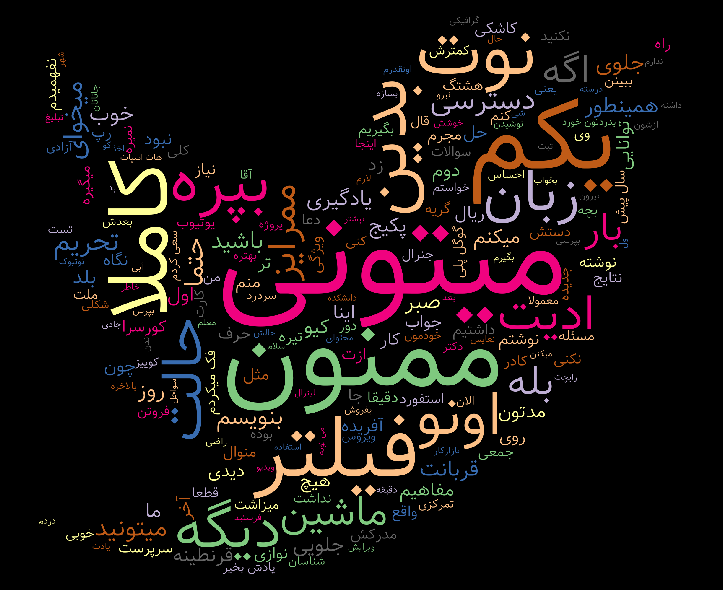

In [5]:
# This function takes in your text and your mask and generates a wordcloud.

def generate_wordcloud(text, mask):
    
    word_cloud = WordCloudFa(width = 1200, height = 800, background_color='black', mask=mask, colormap = 'Accent',include_numbers=False).generate(text)
    plt.figure(figsize=(10,8),facecolor = 'black', edgecolor='black')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
generate_wordcloud(text, mask)
